#  Vinit Kumar Kamboj Assignment 5 Solution

In [607]:
# pip install github3.py command for install github3
# execute pip install github3.py command from the the command window/terminal
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import os
import sys

import numpy as np
import tensorflow as tf
from datetime import datetime as dt
import github3, json        
from pandas import DataFrame, Series
import numpy as np
from fbprophet import Prophet
import fbprophet
fbprophet.__version__
from datetime import datetime as dt

import pandas as pd 

In [608]:
# Get an API key for GitHub and set it as GITHUB_TOKEN
# Here is the URL to generate your GITHUB_TOKEN
# https://help.github.com/articles/creating-an-access-token-for-command-line-use/

GITHUB_TOKEN = 'fc883137f5dcf306bd9f9de9c50c465c4527fcec'
ORG = 'SPM587SP19'                     
REPO = 'SCM587SP19'
FILENAME_ISSUES = ORG + 'issues.json'

In [609]:
gh = github3.login(token=GITHUB_TOKEN)

f = open(FILENAME_ISSUES, 'w')
for issue in gh.search_issues('type:issue repo:SPM587SP19/SCM587SP19'):          # Find issues from given Repo
            label_name=[]
            data={}
            current_issue = issue.as_json()
            current_issue = json.loads(current_issue)
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
f.close()

INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned
INFO:github3:JSON was returned


In [610]:
list_of_issues_dict_data = [json.loads(line) for line in open('SPM587SP19issues.json')]
issues_df = DataFrame(list_of_issues_dict_data)
issues_df

Author   State   closed_at  created_at  issue_number  \
0    TSP19SCM781    open        None  2019-04-21           494   
1    TSP19SCM781    open        None  2019-04-21           493   
2    TSP19SCM781    open        None  2019-04-21           492   
3    DSP19SCM782    open        None  2019-04-21           491   
4    DSP19SCM782    open        None  2019-04-21           490   
5    DSP19SCM781    open        None  2019-04-21           489   
6    DSP19SCM781    open        None  2019-04-21           488   
7    DSP19SCM781    open        None  2019-04-21           487   
8    SSP19SCM781    open        None  2019-04-20           486   
9    SSP19SCM781    open        None  2019-04-20           485   
10   SSP19SCM781    open        None  2019-04-20           484   
11   SSP19SCM782    open        None  2019-04-20           483   
12   SSP19SCM782    open        None  2019-04-20           482   
13   JSP19SCM03G  closed  2019-04-20  2019-04-20           480   
14   ZSP19SCM65P    open        None  2019-04-20           479   
15   YSP19SCM26X  closed  2019-04-19  2019-04-18           477   
16   RSP19SCM781    open        None  2019-04-18           476   
17   RSP19SCM781    open        None  2019-04-18           475   
18   TSP19SCM782    open        None  2019-04-18           474   
19   TSP19SCM782    open        None  2019-04-18           473   
20   TSP19SCM782    open        None  2019-04-18           472   
21   DSP19SCM782    open        None  2019-04-18           471   
22   DSP19SCM782    open        None  2019-04-18           470   
23   TSP19SCM781    open        None  2019-04-18           469   
24   TSP19SCM781    open        None  2019-04-18           468   
25   TSP19SCM781    open        None  2019-04-18           467   
26   YSP19SCM26X  closed  2019-04-18  2019-04-18           465   
27   SSP19SCM782    open        None  2019-04-17           464   
28   SSP19SCM782    open        None  2019-04-17           463   
29   SSP19SCM781    open        None  2019-04-17           462   
..           ...     ...         ...         ...           ...   
329   SPM587SP19  closed  2019-04-03  2019-03-31            31   
330   SPM587SP19  closed  2019-04-02  2019-03-31            30   
331   SPM587SP19  closed  2019-04-07  2019-03-31            29   
332   SPM587SP19  closed  2019-04-02  2019-03-31            28   
333   SPM587SP19  closed  2019-04-03  2019-03-31            27   
334   SPM587SP19  closed  2019-03-31  2019-03-31            26   
335   SPM587SP19  closed  2019-03-31  2019-03-31            25   
336   SPM587SP19  closed  2019-03-31  2019-03-31            24   
337   SPM587SP19  closed  2019-03-31  2019-03-31            23   
338   SPM587SP19  closed  2019-03-31  2019-03-31            22   
339   SPM587SP19  closed  2019-03-31  2019-03-31            21   
340   SPM587SP19  closed  2019-03-31  2019-03-31            20   
341   SPM587SP19  closed  2019-03-31  2019-03-31            19   
342   SPM587SP19  closed  2019-03-31  2019-03-31            18   
343   SPM587SP19  closed  2019-03-31  2019-03-31            17   
344   SPM587SP19  closed  2019-03-31  2019-03-31            16   
345   SPM587SP19  closed  2019-03-31  2019-03-31            15   
346   SPM587SP19  closed  2019-03-31  2019-03-31            14   
347   SPM587SP19  closed  2019-03-31  2019-03-30            13   
348   SPM587SP19  closed  2019-03-31  2019-03-30            12   
349   SPM587SP19  closed  2019-03-31  2019-03-30            11   
350   SPM587SP19  closed  2019-03-31  2019-03-30            10   
351   SPM587SP19  closed  2019-03-31  2019-03-30             9   
352   SPM587SP19  closed  2019-03-31  2019-03-30             8   
353   SPM587SP19  closed  2019-03-31  2019-03-30             7   
354   SPM587SP19  closed  2019-03-31  2019-03-30             6   
355   SPM587SP19  closed  2019-03-31  2019-03-30             5   
356   SPM587SP19  closed  2019-03-31  2019-03-29             4   
357   SPM587SP19  closed  2019-03-31  2019-03-29  

In [611]:
wrangled_issues_df = issues_df[['Author','State','closed_at','created_at','issue_number','labels']]
wrangled_issues_df.loc[0:len(wrangled_issues_df), 'OriginationPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'DetectionPhase']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Category']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Priority']= np.NaN
wrangled_issues_df.loc[0:len(wrangled_issues_df),'Status']= np.NaN
wrangled_issues_df

Author   State   closed_at  created_at  issue_number  \
0    TSP19SCM781    open        None  2019-04-21           494   
1    TSP19SCM781    open        None  2019-04-21           493   
2    TSP19SCM781    open        None  2019-04-21           492   
3    DSP19SCM782    open        None  2019-04-21           491   
4    DSP19SCM782    open        None  2019-04-21           490   
5    DSP19SCM781    open        None  2019-04-21           489   
6    DSP19SCM781    open        None  2019-04-21           488   
7    DSP19SCM781    open        None  2019-04-21           487   
8    SSP19SCM781    open        None  2019-04-20           486   
9    SSP19SCM781    open        None  2019-04-20           485   
10   SSP19SCM781    open        None  2019-04-20           484   
11   SSP19SCM782    open        None  2019-04-20           483   
12   SSP19SCM782    open        None  2019-04-20           482   
13   JSP19SCM03G  closed  2019-04-20  2019-04-20           480   
14   ZSP19SCM65P    open        None  2019-04-20           479   
15   YSP19SCM26X  closed  2019-04-19  2019-04-18           477   
16   RSP19SCM781    open        None  2019-04-18           476   
17   RSP19SCM781    open        None  2019-04-18           475   
18   TSP19SCM782    open        None  2019-04-18           474   
19   TSP19SCM782    open        None  2019-04-18           473   
20   TSP19SCM782    open        None  2019-04-18           472   
21   DSP19SCM782    open        None  2019-04-18           471   
22   DSP19SCM782    open        None  2019-04-18           470   
23   TSP19SCM781    open        None  2019-04-18           469   
24   TSP19SCM781    open        None  2019-04-18           468   
25   TSP19SCM781    open        None  2019-04-18           467   
26   YSP19SCM26X  closed  2019-04-18  2019-04-18           465   
27   SSP19SCM782    open        None  2019-04-17           464   
28   SSP19SCM782    open        None  2019-04-17           463   
29   SSP19SCM781    open        None  2019-04-17           462   
..           ...     ...         ...         ...           ...   
329   SPM587SP19  closed  2019-04-03  2019-03-31            31   
330   SPM587SP19  closed  2019-04-02  2019-03-31            30   
331   SPM587SP19  closed  2019-04-07  2019-03-31            29   
332   SPM587SP19  closed  2019-04-02  2019-03-31            28   
333   SPM587SP19  closed  2019-04-03  2019-03-31            27   
334   SPM587SP19  closed  2019-03-31  2019-03-31            26   
335   SPM587SP19  closed  2019-03-31  2019-03-31            25   
336   SPM587SP19  closed  2019-03-31  2019-03-31            24   
337   SPM587SP19  closed  2019-03-31  2019-03-31            23   
338   SPM587SP19  closed  2019-03-31  2019-03-31            22   
339   SPM587SP19  closed  2019-03-31  2019-03-31            21   
340   SPM587SP19  closed  2019-03-31  2019-03-31            20   
341   SPM587SP19  closed  2019-03-31  2019-03-31            19   
342   SPM587SP19  closed  2019-03-31  2019-03-31            18   
343   SPM587SP19  closed  2019-03-31  2019-03-31            17   
344   SPM587SP19  closed  2019-03-31  2019-03-31            16   
345   SPM587SP19  closed  2019-03-31  2019-03-31            15   
346   SPM587SP19  closed  2019-03-31  2019-03-31            14   
347   SPM587SP19  closed  2019-03-31  2019-03-30            13   
348   SPM587SP19  closed  2019-03-31  2019-03-30            12   
349   SPM587SP19  closed  2019-03-31  2019-03-30            11   
350   SPM587SP19  closed  2019-03-31  2019-03-30            10   
351   SPM587SP19  closed  2019-03-31  2019-03-30             9   
352   SPM587SP19  closed  2019-03-31  2019-03-30             8   
353   SPM587SP19  closed  2019-03-31  2019-03-30             7   
354   SPM587SP19  closed  2019-03-31  2019-03-30             6   
355   SPM587SP19  closed  2019-03-31  2019-03-30             5   
356   SPM587SP19  closed  2019-03-31  2019-03-29             4   
357   SPM587SP19  closed  2019-03-31  2019-03-29  

In [612]:
for i in range(0, len(wrangled_issues_df)):
   if wrangled_issues_df.iloc[i]['labels']:
        for label in wrangled_issues_df.iloc[i]['labels']:
            label_name= (label.split(':'))[0]
            label_value= (label.split(':'))[1]
            wrangled_issues_df.loc[i, label_name]=label_value
 

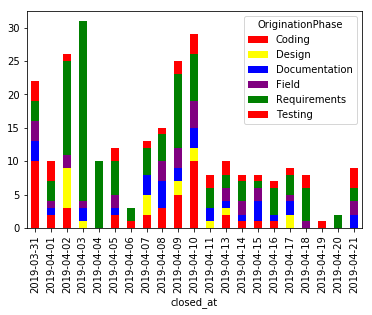

In [613]:
# Requirement #1: Plot in Bar Chart the total number of issues closed every day for every Origination Phase

LabelsReviewedByDate = wrangled_issues_df.groupby(['closed_at','OriginationPhase']).created_at.count()

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

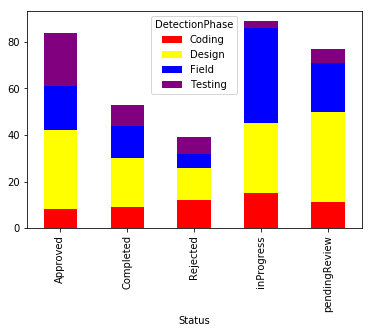

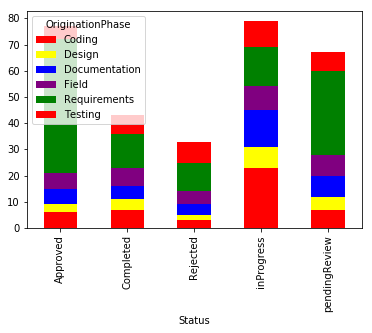

In [615]:
# Requirement #2: Plot in Bar Chart the total number of issues creaed_at every day for every Status
#Graph For Detection Phase
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','DetectionPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

#Graph For Origination Phase
LabelsReviewedByDate = wrangled_issues_df.groupby(['Status','OriginationPhase']).created_at.count()
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['red', 'yellow', 'blue', 'purple', 'green'], grid=False)

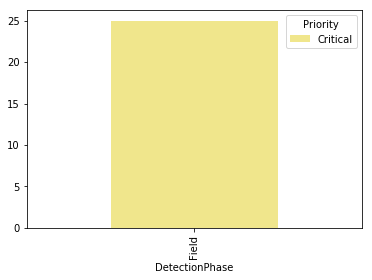

In [616]:
#Requirement #3: Plot in Bar Chart the total number of issues for 
#1) DetectionPhase is Field AND Priority is Critical
LabelsReviewedByDate = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field')&(wrangled_issues_df['Priority']=='Critical')].groupby(['DetectionPhase','Priority']).created_at.count()

bar1 = LabelsReviewedByDate[0]

dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['khaki'], grid=False)


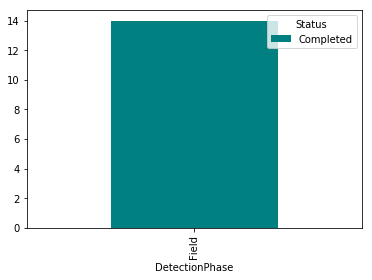

In [617]:
#2) DetectionPhase is Field AND Status is Completed
LabelsReviewedByDate = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field')&(wrangled_issues_df['Status']=='Completed')].groupby(['DetectionPhase','Status']).created_at.count()
bar2 = LabelsReviewedByDate[0]
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['teal'], grid=False)


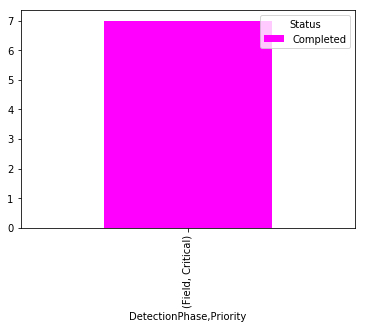

In [618]:
#3) DetectionPhase is Field AND Priority is Critical AND Status is Approved
LabelsReviewedByDate = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field')&(wrangled_issues_df['Priority']=='Critical')&(wrangled_issues_df['Status']=='Completed')].groupby(['DetectionPhase','Priority','Status']).created_at.count()
bar3= LabelsReviewedByDate[0]
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['fuchsia'], grid=False)

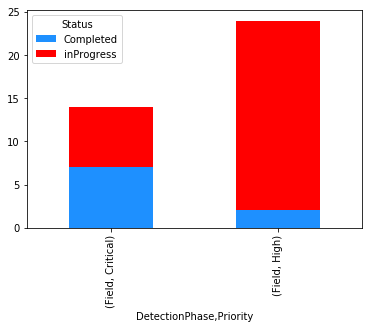

In [619]:
#4) DetectionPhase is Field AND Priority is Critical AND Status is Approved or inProgress
LabelsReviewedByDate = wrangled_issues_df.loc[(wrangled_issues_df['DetectionPhase']=='Field')&((wrangled_issues_df['Priority']=='Critical')|(wrangled_issues_df['Priority']=='High'))&((wrangled_issues_df['Status']=='Completed')|(wrangled_issues_df['Status']=='inProgress'))].groupby(['DetectionPhase','Priority','Status']).created_at.count()
bar4 = LabelsReviewedByDate[0]+LabelsReviewedByDate[1]
bar5 = LabelsReviewedByDate[2]+LabelsReviewedByDate[3]
dateLabelsFig = LabelsReviewedByDate.unstack().plot(kind='bar',stacked=True,  color=['dodgerblue','red'], grid=False)

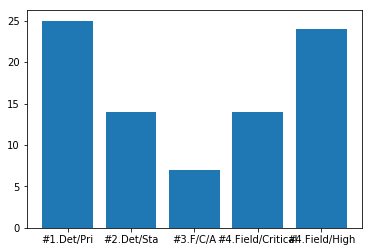

In [620]:
#Requirement 3 Comman graph for all
import numpy as np
import matplotlib.pyplot as plt
 
# Make a fake dataset:
height = [bar1, bar2, bar3,bar4,bar5]
bars = ('#1.Det/Pri', '#2.Det/Sta', '#3.F/C/A','#4.Field/Critical','#4.Field/High' )
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos,height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()

# Facebook Prophet

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument o

                  ds_orig   y
ds_new                       
2019-03-18 0   2019-03-24   1
2019-03-25 3   2019-03-31  42
2019-04-01 6   2019-04-03  37
2019-04-08 13  2019-04-10  35
2019-04-15 20  2019-04-18  12


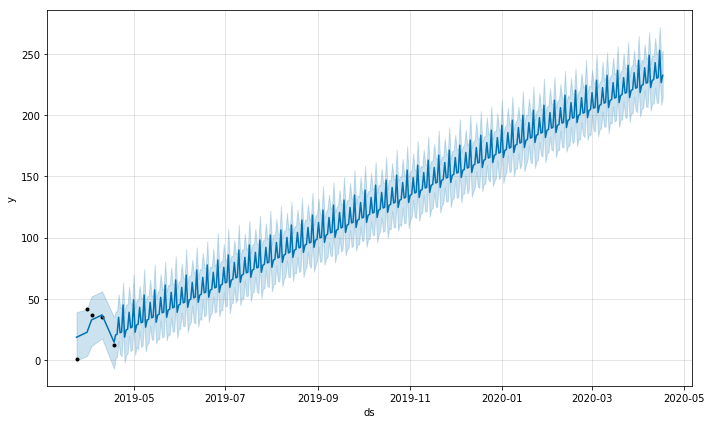

In [621]:
#select created_at as date_created, count(created_at) as cnt from issues_fbprophet  group by created_at order by cnt desc
#4.1 the day of the week maximum number of issue created

df = wrangled_issues_df.groupby('created_at')['created_at']
df_new = df.describe()
s1 = pd.Series(df_new['top'], name='ds_orig')
df_new = pd.concat([df_new, s1], axis=1)
pdf = pd.DataFrame(['ds','ds_orig','y'])
pdf = df_new[['top','ds_orig','count']]
pdf.columns = ['ds','ds_orig','y']
pdf
pdf['ds_new'] = pd.to_datetime(pdf['ds']) - pd.to_timedelta(7, unit='d')
df_weekly_max = pdf.reset_index().groupby([pd.Grouper(key='ds_new', freq='W-MON')]).apply(lambda x: x.loc[x.y == x.y.max(),['ds_orig','y']])
print(df_weekly_max)
df_final = pd.DataFrame(['ds','y'])
df_final = df_weekly_max[['ds_orig','y']]
df_final.columns = ['ds','y']
m = Prophet()
m.fit(df_final)
future = m.make_future_dataframe(periods=365) # Forcast for 1 year
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail()
fig1 = m.plot(forecast)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 3.0.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument o

                  ds_orig   y
ds_new                       
2019-03-25 0   2019-03-31  25
2019-04-01 2   2019-04-02  34
           3   2019-04-03  34
2019-04-08 10  2019-04-10  41
2019-04-15 17  2019-04-18  11


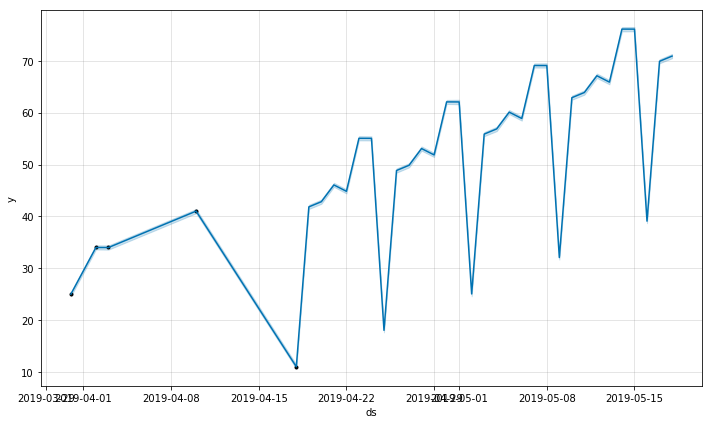

In [622]:
#4.2 the day of the week maximum number of issue closed
maxissueclosedday = wrangled_issues_df.groupby(['closed_at']).size().to_frame('max_issue_count').reset_index().sort_values(['max_issue_count'], ascending=[False]).head(1)
maxissueclosedday
df = wrangled_issues_df.groupby('closed_at')['closed_at']
df_new = df.describe()
s1 = pd.Series(df_new['top'], name='ds_orig')
df_new = pd.concat([df_new, s1], axis=1)
pdf = pd.DataFrame(['ds','ds_orig','y'])
pdf = df_new[['top','ds_orig','count']]
pdf.columns = ['ds','ds_orig','y']
pdf
pdf['ds_new'] = pd.to_datetime(pdf['ds']) - pd.to_timedelta(7, unit='d')
df_weekly_max = pdf.reset_index().groupby([pd.Grouper(key='ds_new', freq='W-MON')]).apply(lambda x: x.loc[x.y == x.y.max(),['ds_orig','y']])
print(df_weekly_max)
df_final = pd.DataFrame(['ds','y'])
df_final = df_weekly_max[['ds_orig','y']]
df_final.columns = ['ds','y']
m = Prophet()
m.fit(df_final)
future = m.make_future_dataframe(periods=30) # Forcast for 1 year
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
forecast.tail()
fig1 = m.plot(forecast)


In [623]:
#4.3 Plot the created issues forecast by calling the Prophet.plot method and passing in your forecast dataframe.
import time
import time
import datetime
fbCreated_issue = wrangled_issues_df.groupby(['created_at']).size().to_frame('y').reset_index().sort_values(['y'], ascending=[True])
fbCreated_issue.rename(columns={'created_at':'ds'}, inplace=True)
print(fbCreated_issue)


            ds   y
0   2019-03-24   1
1   2019-03-29   2
9   2019-04-06   3
21  2019-04-20   7
10  2019-04-07   7
22  2019-04-21   8
2   2019-03-30   9
7   2019-04-04  10
19  2019-04-17  10
18  2019-04-16  10
17  2019-04-15  10
16  2019-04-14  10
14  2019-04-11  11
20  2019-04-18  12
4   2019-04-01  12
15  2019-04-13  12
11  2019-04-08  16
8   2019-04-05  27
12  2019-04-09  33
13  2019-04-10  35
5   2019-04-02  35
6   2019-04-03  37
3   2019-03-31  42


In [624]:
m = Prophet()
m.fit(fbCreated_issue)


C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.0.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [625]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
383 2020-04-16
384 2020-04-17
385 2020-04-18
386 2020-04-19
387 2020-04-20

In [626]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
383 2020-04-16  129.796000  114.001220  144.538503
384 2020-04-17  134.577712  119.776507  150.255902
385 2020-04-18  127.618996  113.355769  141.492386
386 2020-04-19  134.247357  119.987921  149.234267
387 2020-04-20  133.273077  119.305113  148.506225

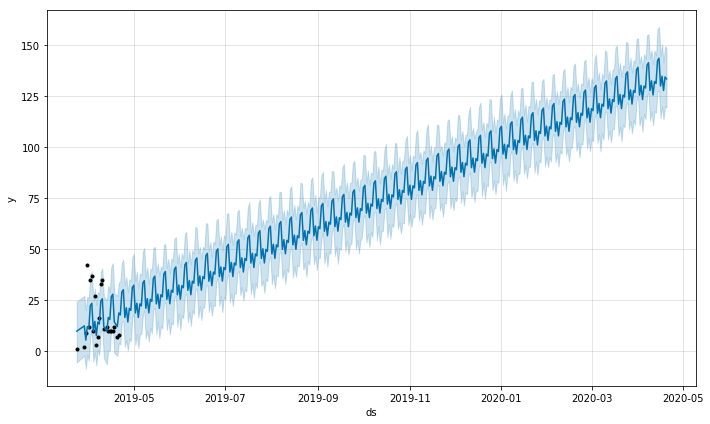

In [627]:
fig1 = m.plot(forecast)

In [628]:
#4.4 Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll see the trend,
#yearly seasonality, and weekly seasonality of the time series. If you include holidays,you’ll see those here, too.
fbClosed_issue = wrangled_issues_df.groupby(['closed_at']).size().to_frame('y').reset_index().sort_values(['y'], ascending=[False])
fbClosed_issue.rename(columns={'closed_at':'ds'}, inplace=True)
fbClosed_issue

ds   y
10  2019-04-10  41
2   2019-04-02  34
3   2019-04-03  34
9   2019-04-09  28
0   2019-03-31  25
8   2019-04-08  16
5   2019-04-05  15
7   2019-04-07  14
4   2019-04-04  14
1   2019-04-01  12
11  2019-04-11  12
17  2019-04-18  11
12  2019-04-13  10
13  2019-04-14  10
14  2019-04-15  10
15  2019-04-16  10
16  2019-04-17  10
20  2019-04-21  10
6   2019-04-06   3
19  2019-04-20   2
18  2019-04-19   1

In [629]:
#Including holidays for closed issues 
import pandas as pd 
playoffs = pd.DataFrame({
  'holiday': 'playoff',
  'ds': pd.to_datetime(['2019-04-01', '2019-04-02', '2019-05-01',
                        '2019-04-15', '2019-04-10', '2019-05-12',
                        ]),
  'lower_window': 0,
  'upper_window': 1,
})

holidays = playoffs
print(holidays)

   holiday         ds  lower_window  upper_window
0  playoff 2019-04-01             0             1
1  playoff 2019-04-02             0             1
2  playoff 2019-05-01             0             1
3  playoff 2019-04-15             0             1
4  playoff 2019-04-10             0             1
5  playoff 2019-05-12             0             1


In [630]:
m = Prophet(yearly_seasonality = True,  holidays = holidays)
m.fit(fbClosed_issue)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.0.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [631]:
future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
381 2020-04-16 -253.922392 -260.119878 -246.725895
382 2020-04-17 -260.069299 -266.667869 -253.239555
383 2020-04-18 -262.601335 -269.474865 -256.004112
384 2020-04-19 -255.540658 -262.555145 -249.021356
385 2020-04-20 -265.969240 -272.869917 -259.420041

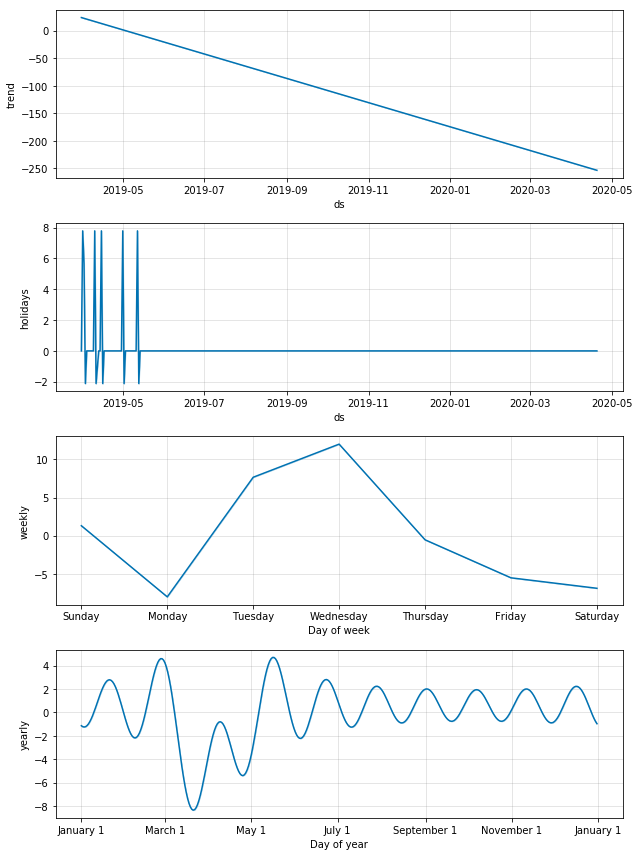

In [632]:
fig2 = m.plot_components(forecast)

In [633]:
## 4.5 plot the pull forecast from facebook/prophet

gh = github3.login(token=GITHUB_TOKEN)
REPO = 'prophet'
FILENAME_ISSUES = REPO + 'pull.json'
f = open(FILENAME_ISSUES, 'w')
for issue in gh.search_issues('type:pr repo:SPM587SP19/SCM587SP19'):        # Find issues from given Repo
            label_name=[]
            data={}
           
            current = issue.as_json()
            current_issue =json.loads(current)
           
           
            data['issue_number']=current_issue["number"]                          # Get issue number              
            data['created_at']= current_issue["created_at"][0:10]                 # Get created date of issue
            if current_issue["closed_at"] == None:
                data['closed_at']= current_issue["closed_at"]
            else:
                data['closed_at']= current_issue["closed_at"][0:10]               # Get closed date of issue
            for label in current_issue["labels"]:
                label_name.append(label["name"])                                  # Get label name of issue
            data['labels']= label_name
            data['State'] = current_issue["state"]                                # It gives state of issue like closed or open
            data['Author'] = current_issue["user"]["login"]                       # Get Author of issue
            out=json.dumps(data)                                                  # save this all information to a JSON file
            f.write(out+ '\n')
f.close()
print('success')


INFO:github3:Building a url from ('https://api.github.com', 'search', 'issues')
INFO:github3:JSON was returned
INFO:github3:JSON was returned


success


In [634]:
list_of_pulls_fb = [json.loads(line) for line in open('prophetpull.json')]
df_list_pull = DataFrame(list_of_pulls_fb)
df_list_pull



Author   State   closed_at  created_at  issue_number labels
0     JSP19SCM03G  closed  2019-04-20  2019-04-20           481     []
1     YSP19SCM26X  closed  2019-04-19  2019-04-19           478     []
2     YSP19SCM26X  closed  2019-04-18  2019-04-18           466     []
3     SSP19SCM81Y  closed  2019-04-20  2019-04-13           424     []
4     JSP19SCM33G  closed  2019-04-11  2019-04-11           411     []
5     HSP19SCM81A  closed  2019-04-11  2019-04-11           399     []
6     HSP19SCM81A  closed  2019-04-11  2019-04-10           398     []
7     MSP19SCM07P  closed  2019-04-10  2019-04-10           386     []
8     ASP19SCM59K  closed  2019-04-10  2019-04-10           385     []
9     PSP19SCM76K  closed  2019-04-10  2019-04-10           384     []
10    SSP19SCM40G  closed  2019-04-10  2019-04-10           382     []
11    PSP19SCM76K  closed  2019-04-10  2019-04-10           381     []
12    CSP19SCM35G  closed  2019-04-10  2019-04-10           379     []
13          ajha8  closed  2019-04-10  2019-04-10           378     []
14    KSP19SCM20P  closed  2019-04-10  2019-04-10           375     []
15    MSP19SCM00A  closed  2019-04-10  2019-04-10           373     []
16    ASP19SCM09A  closed  2019-04-10  2019-04-10           372     []
17   RitikaKumari  closed  2019-04-10  2019-04-10           368     []
18    ZSP19SCM13W  closed  2019-04-10  2019-04-10           367     []
19    ASP19SCM61G  closed  2019-04-10  2019-04-10           366     []
20    CSP19SCM35G  closed  2019-04-10  2019-04-10           365     []
21    shiwanshukr  closed  2019-04-10  2019-04-10           363     []
22    ZSP19SCM13W  closed  2019-04-10  2019-04-10           353     []
23    ASP19SCM61G  closed  2019-04-10  2019-04-10           350     []
24    HSP19SCM39P  closed  2019-04-10  2019-04-10           346     []
25    SSP19SCM52K  closed  2019-04-10  2019-04-09           344     []
26    KSP19SCM90B  closed  2019-04-10  2019-04-09           343     []
27    KSP19SCM75S  closed  2019-04-10  2019-04-09           342     []
28    ASP19SCM71S  closed  2019-04-10  2019-04-09           340     []
29    SSP19SCM44W  closed  2019-04-10  2019-04-09           339     []
..            ...     ...         ...         ...           ...    ...
105   MSP19SCM07P  closed  2019-04-03  2019-04-03           134     []
106   PSP19SCM38K  closed  2019-04-03  2019-04-03           133     []
107       rdhande  closed  2019-04-03  2019-04-03           129     []
108   MSP19SCM00A  closed  2019-04-02  2019-04-02           128     []
109   ASP19SCM71S  closed  2019-04-02  2019-04-02           125     []
110   KSP19SCM90B  closed  2019-04-02  2019-04-02           124     []
111   PSP19SCM40J  closed  2019-04-02  2019-04-02           123     []
112   YSP19SCM81M  closed  2019-04-02  2019-04-02           121     []
113   JSP19SCM65Z  closed  2019-04-02  2019-04-02           119     []
114   ASP19SCM57V  closed  2019-04-02  2019-04-02           118     []
115   PSP19SCM07S  closed  2019-04-02  2019-04-02           117     []
116   HSP19SCM72L  closed  2019-04-02  2019-04-02           116     []
117   VSP19SCM12C  closed  2019-04-02  2019-04-02           104     []
118   XSP19SCM71C  closed  2019-04-02  2019-04-02           102     []
119   SSP19SCM98G  closed  2019-04-02  2019-04-02            97     []
120   KSP19SCM90B  closed  2019-04-02  2019-04-02            96     []
121   VSP19SCM70K  closed  2019-04-02  2019-04-02            93     []
122   fashokkumar  closed  2019-04-02  2019-04-02            91     []
123   SSP19SCM52K  closed  2019-04-02  2019-04-02            90     []
124   NSP19SCM30A  closed  2019-04-02  2019-04-02            89     []
125   SSP19SCM52K  closed  2019-04-02  2019-04-02            88     []
126   NSP19SCM30A  closed  2019-04-02  2019-04-02            86     []
127   fashokkumar  closed  2019-04-02  2019-04-02            85     []
128   JSP19SCM59D  closed  2019-04-02  2019-04-02            84     []
129   MSP19SCM18H  closed  2019-04-

In [635]:
listof_pullfb = df_list_pull.groupby(['created_at']).size().to_frame('y').reset_index().sort_values(['y'], ascending=[True])
listof_pullfb.rename(columns={'created_at':'ds'}, inplace=True)
listof_pullfb.head()


ds  y
0   2019-03-28  1
1   2019-04-01  1
12  2019-04-13  1
13  2019-04-18  1
14  2019-04-19  1

In [636]:
#Adding holidays to the dataframe
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2019-04-07', '2019-04-06', '2019-05-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = superbowls

In [637]:
m = Prophet(yearly_seasonality = True,  holidays = holidays)
m.fit(listof_pullfb)


C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.0.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [638]:
future = m.make_future_dataframe(periods=365)
future.tail()

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
376 2020-04-15  97.482332   94.739924  100.133365
377 2020-04-16  83.901847   81.248273   86.788315
378 2020-04-17  80.467891   77.789245   82.998161
379 2020-04-18  83.679654   81.015905   86.529391
380 2020-04-19  78.827369   76.123925   81.631567

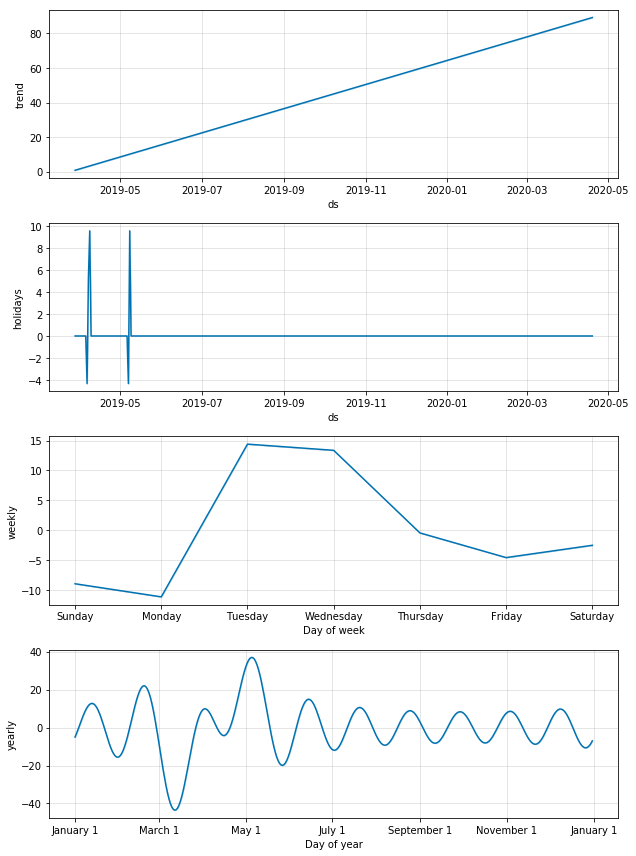

In [639]:
fig3 = m.plot_components(forecast)

In [640]:
# 4.6 plot the commit forecast.
from flask import Flask, request
from flask_restful import Resource, Api
import requests

In [641]:
url = "https://api.github.com/repos/SPM587SP19/SCM587SP19/commits?simple=yes&per_page=100&page=1"
res=requests.get(url,headers={"Authorization": GITHUB_TOKEN})

repos=res.json()
newdataframe = pd.DataFrame(repos) 

In [642]:
while 'next' in res.links.keys():
    res=requests.get(res.links['next']['url'],headers={"Authorization": GITHUB_TOKEN})
    repos.extend(res.json())
temp=[] 
for d in repos:
    x = d['commit']['author']['date']
    y=x.split("T")
    temp.append(y[0])
tempnewdataframe=pd.DataFrame(temp, columns = ["commit_date"])
print(tempnewdataframe)
tempnewdataframe.to_csv("repocommit.csv", index=None ,header=True, encoding='utf-8')

    commit_date
0    2019-04-20
1    2019-04-20
2    2019-04-20
3    2019-04-20
4    2019-04-20
5    2019-04-19
6    2019-04-19
7    2019-04-18
8    2019-04-18
9    2019-04-18
10   2019-04-18
11   2019-04-13
12   2019-04-11
13   2019-04-11
14   2019-04-11
15   2019-04-10
16   2019-04-10
17   2019-04-10
18   2019-04-10
19   2019-04-10
20   2019-04-10
21   2019-04-10
22   2019-04-10
23   2019-04-10
24   2019-04-10
25   2019-04-10
26   2019-04-10
27   2019-04-10
28   2019-04-10
29   2019-04-10
..          ...
410  2019-03-29
411  2019-03-29
412  2019-03-29
413  2019-03-29
414  2019-03-29
415  2019-03-29
416  2019-03-29
417  2019-03-29
418  2019-03-29
419  2019-03-29
420  2019-03-29
421  2019-03-28
422  2019-03-28
423  2019-03-28
424  2019-03-28
425  2019-03-28
426  2019-03-28
427  2019-03-28
428  2019-03-28
429  2019-03-28
430  2019-03-28
431  2019-03-28
432  2019-03-28
433  2019-03-28
434  2019-03-28
435  2019-03-28
436  2019-03-27
437  2019-03-24
438  2019-03-24
439  2019-03-24

[440 ro

In [643]:
list_commitdata = tempnewdataframe.groupby(['commit_date']).size().to_frame('y').reset_index().sort_values(['y'], ascending=[True])
list_commitdata.rename(columns={'commit_date':'ds'}, inplace=True)
list_commitdata.head()

ds  y
1   2019-03-27  1
15  2019-04-13  1
4   2019-04-01  2
17  2019-04-19  2
0   2019-03-24  3

In [644]:
#Adding holidays to the dataframe
superbowls = pd.DataFrame({
  'holiday': 'superbowl',
  'ds': pd.to_datetime(['2019-04-07', '2019-04-06', '2019-05-07']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = superbowls

In [645]:
m = Prophet(yearly_seasonality = True,  holidays = holidays)
m.fit(list_commitdata)


C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.0.
C:\ProgramData\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [646]:
future_commit = m.make_future_dataframe(periods=365)
future_commit.tail()

forecast_commit = m.predict(future_commit)
forecast_commit[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
379 2020-04-15  78.430293   61.754231   96.306357
380 2020-04-16  54.017264   36.929963   71.282375
381 2020-04-17  49.614783   30.844827   67.082592
382 2020-04-18  37.982344   20.327694   56.408028
383 2020-04-19  41.462808   25.456494   58.800745

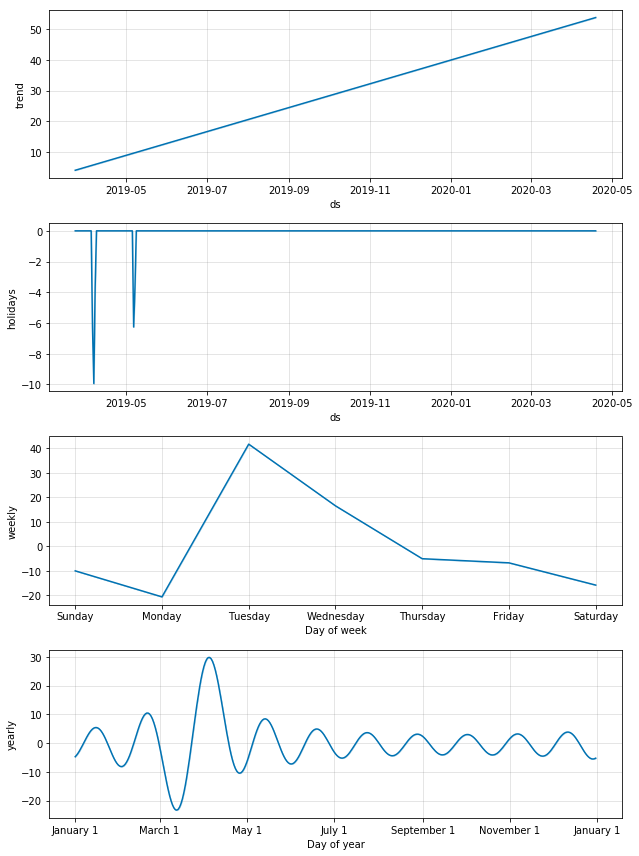

In [647]:
fig_commit = m.plot_components(forecast_commit)

# TensorFlow Question5

In [648]:
from datetime import datetime as dt
import github3, json        
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import tensorflow as tf
import dateparser

In [649]:
def date_parser(date_str):
    t=dateparser.parse(date_str)
    t1=t.timetuple()
    return int(time.mktime(t1))

In [650]:
#Predict.py from GITHUB Tensorflow
def ar_train_and_predict(csv_file_name):

  # An autoregressive model, with periodicity handled as a time-based

  # regression. Note that this requires windows of size 16 (input_window_size +

  # output_window_size) for training.

  ar = tf.contrib.timeseries.ARRegressor(

      periodicities=100, input_window_size=2, output_window_size=2,

      num_features=1,

      # Use the (default) normal likelihood loss to adaptively fit the

      # variance. SQUARED_LOSS overestimates variance when there are trends in

      # the series.

      loss=tf.contrib.timeseries.ARModel.NORMAL_LIKELIHOOD_LOSS)

  return train_and_predict(ar, csv_file_name, training_steps=1000)





def train_and_predict(estimator, csv_file_name, training_steps):

    """A simple example of training and predicting."""

    # Read data in the default "time,value" CSV format with no header

    #reader = tf.contrib.timeseries.CSVReader(csv_file_name)
    data = pd.read_csv(csv_file_name, header=0, parse_dates=['timestamp'], date_parser=date_parser)

    data['timestamp'] = data['timestamp'].apply(lambda x: date_parser(str(x)))
    
    reader = tf.contrib.timeseries.NumpyReader(data={tf.contrib.timeseries.TrainEvalFeatures.TIMES: data['timestamp'].values, tf.contrib.timeseries.TrainEvalFeatures.VALUES : data['value'].values})

    # Set up windowing and batching for training

    train_input_fn = tf.contrib.timeseries.RandomWindowInputFn(

      reader, batch_size=16, window_size=4)

    # Fit model parameters to data

    estimator.train(input_fn=train_input_fn, steps=training_steps)

    # Evaluate on the full dataset sequentially, collecting in-sample predictions

    # for a qualitative evaluation. Note that this loads the whole dataset into

    # memory. For quantitative evaluation, use RandomWindowChunker.

    evaluation_input_fn = tf.contrib.timeseries.WholeDatasetInputFn(reader)

    evaluation = estimator.evaluate(input_fn=evaluation_input_fn, steps=1)

    # Predict starting after the evaluation

    (predictions,) = tuple(estimator.predict(

      input_fn=tf.contrib.timeseries.predict_continuation_input_fn(

          evaluation, steps=200)))

    times = evaluation["times"][0]

    observed = evaluation["observed"][0, :, 0]

    mean = np.squeeze(np.concatenate(

      [evaluation["mean"][0], predictions["mean"]], axis=0))

    variance = np.squeeze(np.concatenate(

      [evaluation["covariance"][0], predictions["covariance"]], axis=0))

    all_times = np.concatenate([times, predictions["times"]], axis=0)

    upper_limit = mean + np.sqrt(variance)

    lower_limit = mean - np.sqrt(variance)

    return times, observed, all_times, mean, upper_limit, lower_limit





def make_plot(name, training_times, observed, all_times, mean,

              upper_limit, lower_limit):

  """Plot a time series in a new figure."""

  pyplot.figure()

  pyplot.plot(training_times, observed, "b", label="training series")

  pyplot.plot(all_times, mean, "r", label="forecast")

  pyplot.plot(all_times, upper_limit, "g", label="forecast upper bound")

  pyplot.plot(all_times, lower_limit, "g", label="forecast lower bound")

  pyplot.fill_between(all_times, lower_limit, upper_limit, color="grey",

                      alpha="0.2")

  pyplot.axvline(training_times[-1], color="k", linestyle="--")

  pyplot.xlabel("time")

  pyplot.ylabel("observations")

  pyplot.legend(loc=0)

  pyplot.title(name)




In [651]:
df = wrangled_issues_df.groupby('created_at')['created_at']
df_new = df.describe()
dfnew1 = pd.Series(df_new['top'], name='ds_original')
df_new = pd.concat([df_new, dfnew1], axis=1)
datafrm_pdf = pd.DataFrame(['ds','ds_original','y'])
datafrm_pdf = df_new[['top','ds_original','count']]
datafrm_pdf.columns = ['ds','ds_original','y']
datafrm_pdf['ds_new'] = pd.to_datetime(datafrm_pdf['ds']) - pd.to_timedelta(7, unit='d')
df_weekly_maximum = datafrm_pdf.reset_index().groupby([pd.Grouper(key='ds_new', freq='W-MON')]).apply(lambda x: x.loc[x.y == x.y.max(),['ds_original','y']])
df_created_output = pd.DataFrame(['ds','y'])
df_created_output = df_weekly_maximum[['ds_original','y']]
df_created_output.columns = ['ds','y']
tensor_Created = df_created_output
tensor_Created = tensor_Created[['ds','y']]
df = pd.DataFrame(tensor_Created)
tensor_Created.rename(columns={'ds':'timestamp'}, inplace=True)
tensor_Created.rename(columns={'y':'value'}, inplace=True)
print(tensor_Created)

                timestamp value
ds_new                         
2019-03-18 0   2019-03-24     1
2019-03-25 3   2019-03-31    42
2019-04-01 6   2019-04-03    37
2019-04-08 13  2019-04-10    35
2019-04-15 20  2019-04-18    12


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [652]:
tensor_Created.to_csv("tenso_created.csv", index=None ,header=True )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vinit\\AppData\\Local\\Temp\\tmp4_rkkv4j', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA403928D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

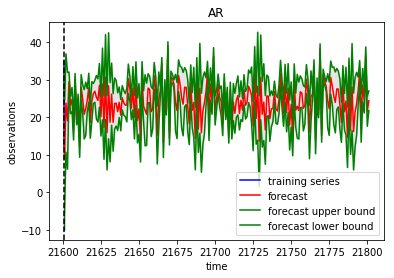

In [653]:
#Tensorflow question 5.1
from matplotlib import pyplot
make_plot("AR", *ar_train_and_predict("tenso_created.csv"))
pyplot.show()

In [654]:
## Tensorflow Question 5.2 maximum number issues closed

df = wrangled_issues_df.groupby('closed_at')['closed_at']
df_new = df.describe()
dfnew1 = pd.Series(df_new['top'], name='ds_original')
df_new = pd.concat([df_new, dfnew1], axis=1)
datafrm_pdf = pd.DataFrame(['ds','ds_original','y'])
datafrm_pdf = df_new[['top','ds_original','count']]
datafrm_pdf.columns = ['ds','ds_original','y']
datafrm_pdf['ds_new'] = pd.to_datetime(datafrm_pdf['ds']) - pd.to_timedelta(7, unit='d')
df_weekly_maximum = datafrm_pdf.reset_index().groupby([pd.Grouper(key='ds_new', freq='W-MON')]).apply(lambda x: x.loc[x.y == x.y.max(),['ds_original','y']])
df_closed_output = pd.DataFrame(['ds','y'])
df_closed_output = df_weekly_maximum[['ds_original','y']]
df_closed_output.columns = ['ds','y']

tensor_closed = df_closed_output
tensor_closed = tensor_closed[['ds','y']]
df = pd.DataFrame(tensor_closed)
tensor_closed.rename(columns={'ds':'timestamp'}, inplace=True)
tensor_closed.rename(columns={'y':'value'}, inplace=True)
print(tensor_Created)

                timestamp value
ds_new                         
2019-03-18 0   2019-03-24     1
2019-03-25 3   2019-03-31    42
2019-04-01 6   2019-04-03    37
2019-04-08 13  2019-04-10    35
2019-04-15 20  2019-04-18    12


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [655]:
tensor_closed.to_csv("tenso_closed.csv", index=None ,header=True )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vinit\\AppData\\Local\\Temp\\tmp5fn2ra7g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA3A4B83C8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

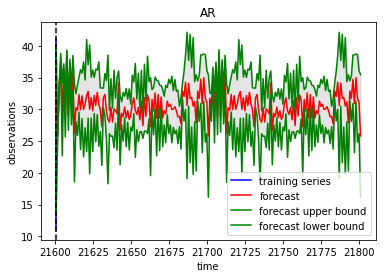

In [656]:
from matplotlib import pyplot
make_plot("AR", *ar_train_and_predict("tenso_closed.csv"))
pyplot.show()

In [657]:
#5.3 TensorFlow 
import time
import time
import datetime
fbCreated_issue = wrangled_issues_df.groupby(['created_at']).size().to_frame('y').reset_index().sort_values(['y'], ascending=[True])
fbCreated_issue.rename(columns={'created_at':'ds'}, inplace=True)
tensorfbissue_issue = fbCreated_issue
tensorfbissue_issue = tensorfbissue_issue[['ds','y']]
df = pd.DataFrame(tensorfbissue_issue)
tensorfbissue_issue.rename(columns={'ds':'timestamp'}, inplace=True)
tensorfbissue_issue.rename(columns={'y':'value'}, inplace=True)
print(tensorfbissue_issue)


     timestamp  value
0   2019-03-24      1
1   2019-03-29      2
9   2019-04-06      3
21  2019-04-20      7
10  2019-04-07      7
22  2019-04-21      8
2   2019-03-30      9
7   2019-04-04     10
19  2019-04-17     10
18  2019-04-16     10
17  2019-04-15     10
16  2019-04-14     10
14  2019-04-11     11
20  2019-04-18     12
4   2019-04-01     12
15  2019-04-13     12
11  2019-04-08     16
8   2019-04-05     27
12  2019-04-09     33
13  2019-04-10     35
5   2019-04-02     35
6   2019-04-03     37
3   2019-03-31     42


In [658]:
tensorfbissue_issue.to_csv("tensorfbissue_issue.csv", index=None ,header=True )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vinit\\AppData\\Local\\Temp\\tmpvqr56vil', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA39FF4F28>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

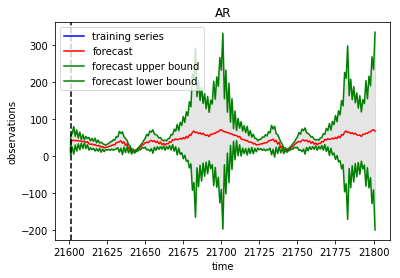

In [659]:
from matplotlib import pyplot
make_plot("AR", *ar_train_and_predict("tensorfbissue_issue.csv"))
pyplot.show()

In [660]:
#Tensorflow issue 5.4
fbClosed_issue = wrangled_issues_df.groupby(['closed_at']).size().to_frame('y').reset_index().sort_values(['y'], ascending=[False])
fbClosed_issue.rename(columns={'closed_at':'ds'}, inplace=True)
tensorfclosed_issue = fbClosed_issue
tensorfclosed_issue = tensorfclosed_issue[['ds','y']]
df = pd.DataFrame(tensorfclosed_issue)
tensorfclosed_issue.rename(columns={'ds':'timestamp'}, inplace=True)
tensorfclosed_issue.rename(columns={'y':'value'}, inplace=True)
print(tensorfclosed_issue)


     timestamp  value
10  2019-04-10     41
2   2019-04-02     34
3   2019-04-03     34
9   2019-04-09     28
0   2019-03-31     25
8   2019-04-08     16
5   2019-04-05     15
7   2019-04-07     14
4   2019-04-04     14
1   2019-04-01     12
11  2019-04-11     12
17  2019-04-18     11
12  2019-04-13     10
13  2019-04-14     10
14  2019-04-15     10
15  2019-04-16     10
16  2019-04-17     10
20  2019-04-21     10
6   2019-04-06      3
19  2019-04-20      2
18  2019-04-19      1


In [661]:
tensorfclosed_issue.to_csv("tensorclosed_issue.csv", index=None ,header=True )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vinit\\AppData\\Local\\Temp\\tmprpyycitf', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA3C34B710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

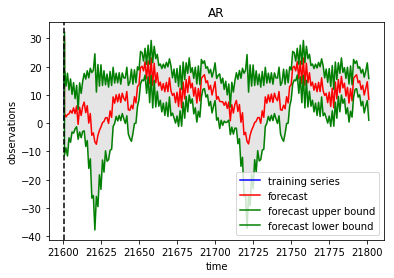

In [662]:
from matplotlib import pyplot
make_plot("AR", *ar_train_and_predict("tensorclosed_issue.csv"))
pyplot.show()

In [663]:
#Tensorflow question 5.5

list_of_pulls_fb = [json.loads(line) for line in open('prophetpull.json')]
df_list_pull = DataFrame(list_of_pulls_fb)
df_list_pull
listof_pullfb = df_list_pull.groupby(['created_at']).size().to_frame('y').reset_index().sort_values(['y'], ascending=[True])
listof_pullfb.rename(columns={'created_at':'ds'}, inplace=True)
listof_pullfb.head()
tensorfpull_issue = listof_pullfb
tensorfpull_issue = tensorfpull_issue[['ds','y']]
df = pd.DataFrame(tensorfpull_issue)
tensorfpull_issue.rename(columns={'ds':'timestamp'}, inplace=True)
tensorfpull_issue.rename(columns={'y':'value'}, inplace=True)
print(tensorfpull_issue)

     timestamp  value
0   2019-03-28      1
1   2019-04-01      1
12  2019-04-13      1
13  2019-04-18      1
14  2019-04-19      1
15  2019-04-20      1
11  2019-04-11      2
6   2019-04-06      4
5   2019-04-05      5
7   2019-04-07      6
8   2019-04-08      6
4   2019-04-04     15
10  2019-04-10     19
9   2019-04-09     22
2   2019-04-02     25
3   2019-04-03     25


In [664]:
tensorfpull_issue.to_csv("tensorpull_issue.csv", index=None ,header=True )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vinit\\AppData\\Local\\Temp\\tmpo4423uxg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA39DF2198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

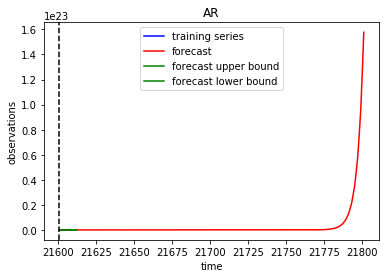

In [665]:
from matplotlib import pyplot
make_plot("AR", *ar_train_and_predict("tensorpull_issue.csv"))
pyplot.show()

In [666]:
#Tensorflow 5.6 Commit data
tensorfcommit_issue = list_commitdata
tensorfcommit_issue = tensorfcommit_issue[['ds','y']]
df = pd.DataFrame(tensorfcommit_issue)
tensorfcommit_issue.rename(columns={'ds':'timestamp'}, inplace=True)
tensorfcommit_issue.rename(columns={'y':'value'}, inplace=True)
print(tensorfcommit_issue)

     timestamp  value
1   2019-03-27      1
15  2019-04-13      1
4   2019-04-01      2
17  2019-04-19      2
0   2019-03-24      3
14  2019-04-11      3
16  2019-04-18      4
18  2019-04-20      5
9   2019-04-06      7
10  2019-04-07     12
2   2019-03-28     15
8   2019-04-05     16
11  2019-04-08     16
3   2019-03-29     27
7   2019-04-04     51
13  2019-04-10     58
12  2019-04-09     61
6   2019-04-03     67
5   2019-04-02     89


In [667]:
tensorfcommit_issue.to_csv("tensorcommit_issue.csv", index=None ,header=True )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\vinit\\AppData\\Local\\Temp\\tmp5cukp77m', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BA39DF21D0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create Checkp

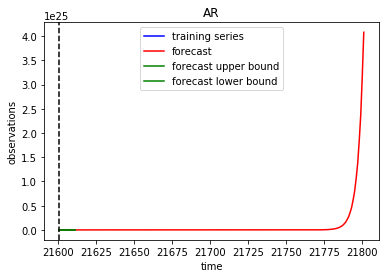

In [668]:
from matplotlib import pyplot
make_plot("AR", *ar_train_and_predict("tensorcommit_issue.csv"))
pyplot.show()

# STATESMODEL

In [671]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose

def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
def timeseries(csv_file):
    series = read_csv(csv_file, header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(1,0,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('predicted=%f, expected=%f' % (yhat, obs))
    error = mean_squared_error(test, predictions)
    print('Test MSE: %.3f' % error)
    # plot
    pyplot.plot(test)
    pyplot.plot(predictions, color='red')
    pyplot.show()

    result = seasonal_decompose(list(predictions), model='additive', freq=1)
    result.plot()
    pyplot.show()

predicted=24.805887, expected=35.000000
predicted=28.878582, expected=12.000000
Test MSE: 194.403


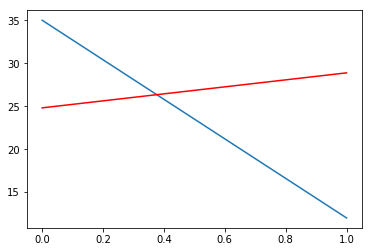

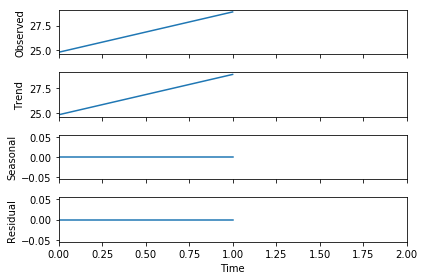

In [672]:
# 6.1 The day of the week maximum number of issues created
timeseries("tenso_created.csv")

predicted=30.325766, expected=41.000000
predicted=33.444238, expected=11.000000
Test MSE: 308.842


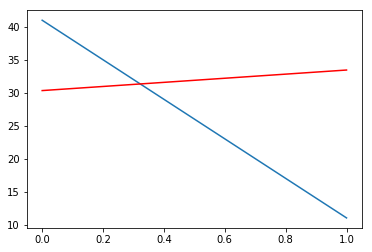

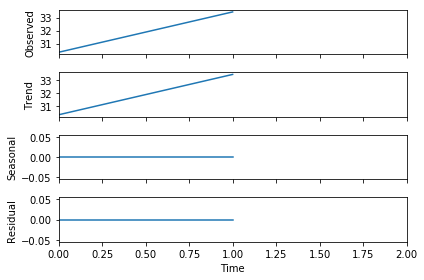

In [673]:
# 6.2 The day of the week maximum number of issues closed 
timeseries("tenso_closed.csv")


predicted=11.824667, expected=12.000000
predicted=11.840266, expected=16.000000
predicted=15.781109, expected=27.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater


predicted=26.389421, expected=33.000000
predicted=32.506154, expected=35.000000
predicted=34.581502, expected=35.000000
predicted=34.615726, expected=37.000000
predicted=36.659681, expected=42.000000
Test MSE: 28.437


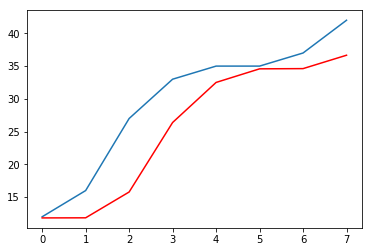

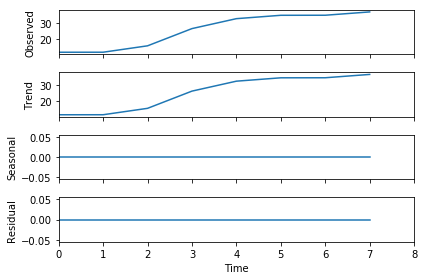

In [674]:
# 6.3 Plot the created issues forecast by calling the
#Prophet.plot method and passing in your forecast
#dataframe.

timeseries("tensorfbissue_issue.csv")

predicted=10.559520, expected=10.000000
predicted=10.504275, expected=10.000000
predicted=10.459209, expected=10.000000
predicted=10.421690, expected=10.000000
predicted=10.389938, expected=10.000000
predicted=10.362699, expected=3.000000
predicted=3.407711, expected=2.000000
predicted=2.373549, expected=1.000000
Test MSE: 7.398


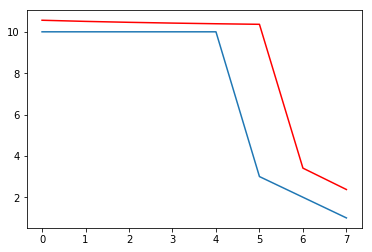

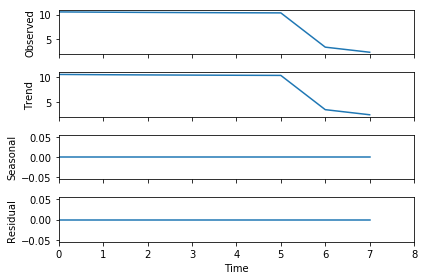

In [675]:
# 6.4 Plot the closed issues forecast; use the Prophet.plot_components method. By default you’ll
#see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,
#you’ll see those here, too.

timeseries("tensorclosed_issue.csv")

predicted=5.791948, expected=6.000000
predicted=5.827277, expected=15.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater


predicted=13.826877, expected=19.000000
predicted=18.260137, expected=22.000000
predicted=21.434966, expected=25.000000
predicted=24.535175, expected=25.000000
Test MSE: 22.976


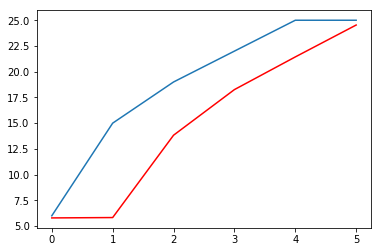

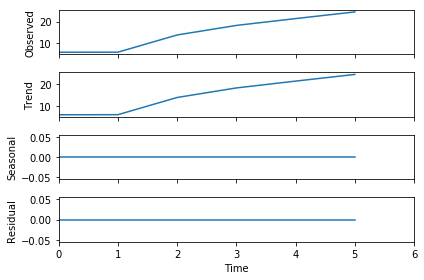

In [676]:
# 6.5 Prophet.plot_components method. By default you’ll see the trend, yearly seasonality, and weekly
#seasonality of the time series. If you include holidays,
#you’ll see those here, too.

timeseries("tensorpull_issue.csv")

predicted=15.668490, expected=16.000000
predicted=15.710119, expected=27.000000
predicted=26.289644, expected=51.000000


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:649: RuntimeWarning: divide by zero encountered in true_divide
  R_mat, T_mat)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
C:\ProgramData\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1942: RuntimeWarning: invalid value encountered in greater


predicted=49.289009, expected=58.000000
predicted=56.705617, expected=61.000000
predicted=59.909993, expected=67.000000
predicted=66.068217, expected=89.000000
Test MSE: 201.233


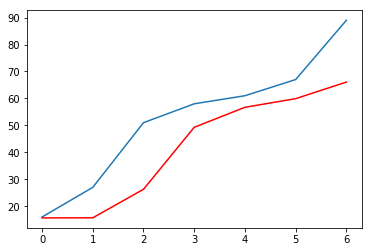

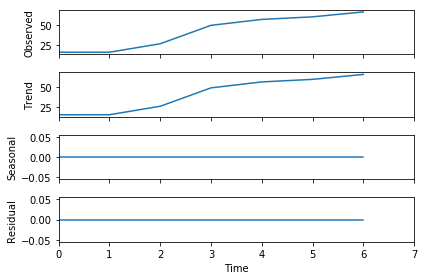

In [677]:
# 6.6  (Statsmodel) Plot the commits forecast; use the Prophet.plot_components method. 
#By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays,
#you’ll see those here, too.

timeseries("tensorcommit_issue.csv")


# THE END